<a href="https://colab.research.google.com/github/Sweetmonee/colab/blob/main/Nov_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [5]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [7]:
data = mnist.load_data()
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

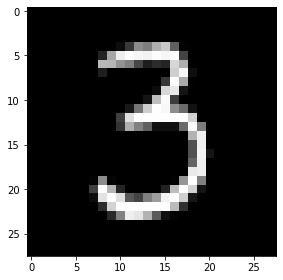

In [11]:
plt.figure()
plt.imshow(x_train[50].reshape(28,28) , cmap= 'gray')
plt.tight_layout()

#데이터 정규화

In [14]:
X_train = x_train.reshape(60000 ,784)
X_test = x_test.reshape(10000,784)


In [15]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [17]:
X_train /= 255
X_test /= 255
print('X Training matrix shape',X_train.shape)
print('X Test matrix shape',X_test.shape)

X Training matrix shape (60000, 784)
X Test matrix shape (10000, 784)


In [18]:
X_train[0]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

In [22]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)


In [25]:
print(y_train[0],Y_train[0])

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#모델 학습

In [32]:
model = Sequential()
model.add(Dense(512,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10))
model

In [33]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, Y_train, batch_size = 128, epochs = 10, verbose = 1)

Epoch 1/10
469/469 [==============================] - 7s 13ms/step - loss: 6.7550 - accuracy: 0.1731
Epoch 2/10
469/469 [==============================] - 6s 12ms/step - loss: 6.7202 - accuracy: 0.1773
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 6.7202 - accuracy: 0.1773
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 6.7202 - accuracy: 0.1773
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 6.7202 - accuracy: 0.1773
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 6.7202 - accuracy: 0.1773
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 6.7202 - accuracy: 0.1773
Epoch 8/10
469/469 [==============================] - 6s 12ms/step - loss: 6.7202 - accuracy: 0.1773
Epoch 9/10
469/469 [==============================] - 6s 12ms/step - loss: 6.7202 - accuracy: 0.1773
Epoch 10/10
469/469 [==============================] - 6s 13ms/step - loss: 6.7202 - accura

#모델의 정확도

In [35]:
score = model.evaluate(X_test, Y_test)
print('Test score',score[0])
print('Test accuracy', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 6.8405 - accuracy: 0.1851
Test score 6.840519428253174
Test accuracy 0.1851000040769577


In [37]:
predicted_classes = np.argmax(model.predict(X_test), axis = 1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes !=y_test)[0]

313/313 [==============================] - 1s 3ms/step


In [40]:
len(incorrect_indices)

8149

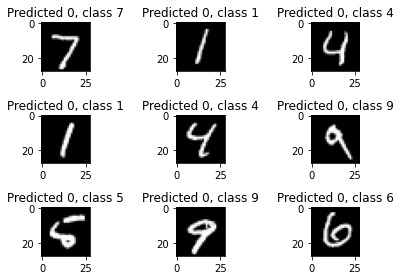

In [44]:
plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  incorrect = incorrect_indices[i]
  plt.imshow(X_test[incorrect].reshape(28,28), cmap = 'gray')
  plt.title('Predicted {}, class {}'.format(predicted_classes[incorrect], y_test[incorrect]))
  plt.tight_layout()